In [1]:
# Install the required libraries:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, mean_squared_error, r2_score
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [19]:
employees = pd.read_csv(r"C:\Users\shubh\Downloads\employee_data.csv")
print(employees.head())
print(employees.info())
print(employees.isnull().sum())
employees.drop_duplicates(inplace = True)

   EmployeeID           Name  Age   Department  Salary  YearsAtCompany  \
0           1       John Doe   29        Sales   55000               3   
1           2     Jane Smith   35           HR   60000               7   
2           3  Michael Brown   40  Engineering   80000              10   
3           4    Emily Davis   28    Marketing   65000               5   
4           5  David Johnson   50        Sales   75000              20   

   PerformanceScore Attrition  
0                80        No  
1                85        No  
2                95       Yes  
3                78        No  
4                88       Yes  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   EmployeeID        100 non-null    int64 
 1   Name              100 non-null    object
 2   Age               100 non-null    int64 
 3   Department        100 non

       EmployeeID         Age        Salary  YearsAtCompany  PerformanceScore
count  100.000000  100.000000    100.000000      100.000000        100.000000
mean    50.500000   36.570000  72820.000000       10.800000         84.940000
std     29.011492    8.318478  12643.823102        6.361183          6.349771
min      1.000000   25.000000  43000.000000        1.000000         70.000000
25%     25.750000   29.750000  65000.000000        5.000000         80.000000
50%     50.500000   35.000000  72000.000000       10.000000         85.500000
75%     75.250000   41.250000  82750.000000       16.000000         90.000000
max    100.000000   60.000000  95000.000000       25.000000         95.000000


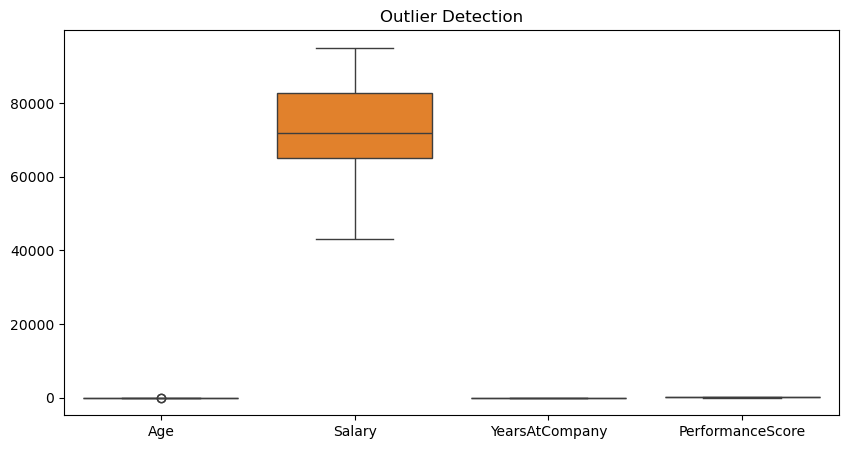

In [29]:
# Summary statistics
print(employees.describe())

# Boxplots for outliers
plt.figure(figsize=(10, 5))
sns.boxplot(data=employees[['Age', 'Salary', 'YearsAtCompany', 'PerformanceScore']])
plt.title("Outlier Detection")
plt.show()

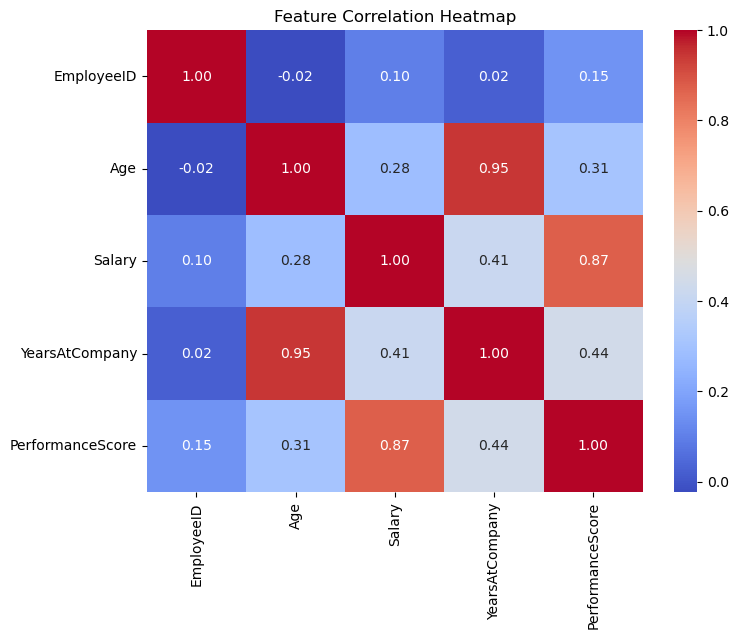

In [33]:
# Select only numeric columns for correlation analysis
numeric_cols = employees.select_dtypes(include=['number'])
corr_matrix = numeric_cols.corr()

# Correlation Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

In [37]:
# Probability of Attrition
attrition_prob = employees["Attrition"].value_counts(normalize=True)
print("Probability of Attrition:\n", attrition_prob)

# Bayes’ Theorem - Attrition Probability Given Performance Score
prob_attrition_given_perf = employees.groupby("PerformanceScore")["Attrition"].value_counts(normalize=True).unstack()
print(prob_attrition_given_perf)

# Hypothesis Testing: Performance by Department
eng = employees[employees["Department"] == "Engineering"]["PerformanceScore"]
sales = employees[employees["Department"] == "Sales"]["PerformanceScore"]

import scipy.stats as stats  # ✅ Add this line

# Sample hypothesis test: Comparing Performance Scores between Engineering and Sales
eng = employees[employees["Department"] == "Engineering"]["PerformanceScore"]
sales = employees[employees["Department"] == "Sales"]["PerformanceScore"]

# Perform Independent T-Test
t_stat, p_value = stats.ttest_ind(eng, sales, equal_var=False)  # Now `stats` is recognized
print(f"T-Statistic: {t_stat}, P-Value: {p_value}")

print(f"T-Statistic: {t_stat}, P-Value: {p_value}")

Probability of Attrition:
 Attrition
No     0.61
Yes    0.39
Name: proportion, dtype: float64
Attrition               No       Yes
PerformanceScore                    
70                0.666667  0.333333
72                1.000000       NaN
75                0.500000  0.500000
76                1.000000       NaN
77                0.500000  0.500000
78                0.400000  0.600000
79                0.800000  0.200000
80                0.888889  0.111111
81                0.333333  0.666667
82                1.000000       NaN
83                0.666667  0.333333
84                0.500000  0.500000
85                0.500000  0.500000
86                0.600000  0.400000
87                0.250000  0.750000
88                0.571429  0.428571
89                0.600000  0.400000
90                0.800000  0.200000
91                0.600000  0.400000
92                0.428571  0.571429
93                0.333333  0.666667
94                0.666667  0.333333
95                

In [39]:
# Encode categorical variables
le = LabelEncoder()
employees["Attrition"] = le.fit_transform(employees["Attrition"])  
employees["Department"] = le.fit_transform(employees["Department"])  

# Standardize numerical features
scaler = StandardScaler()
employees[['Salary', 'YearsAtCompany', 'PerformanceScore']] = scaler.fit_transform(employees[['Salary', 'YearsAtCompany', 'PerformanceScore']])

Accuracy: 0.65
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.69      0.72        13
           1       0.50      0.57      0.53         7

    accuracy                           0.65        20
   macro avg       0.62      0.63      0.63        20
weighted avg       0.66      0.65      0.65        20



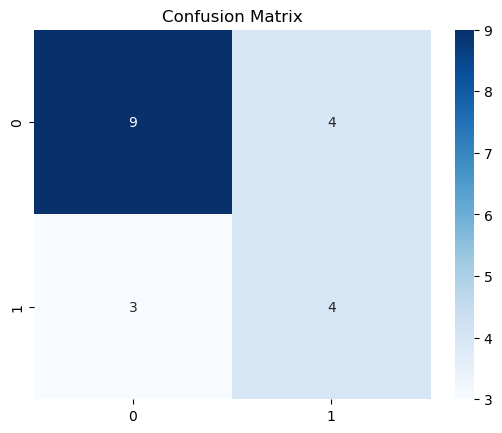

In [41]:
# Define features & target
X = employees.drop(columns=["Attrition", "EmployeeID", "Name"])
y = employees["Attrition"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Predictions
y_pred = clf.predict(X_test)

# Model evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.show()

R-squared: 0.7487625823958994
MSE: 0.3213762399130526


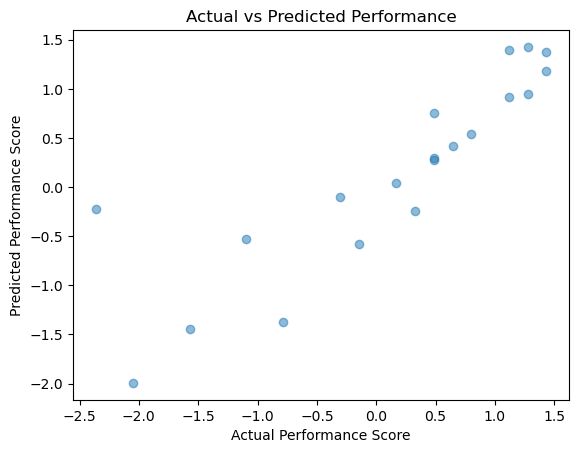

In [43]:
# Define features & target
X = employees.drop(columns=["PerformanceScore", "EmployeeID", "Name"])
y = employees["PerformanceScore"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
reg = LinearRegression()
reg.fit(X_train, y_train)

# Predictions
y_pred = reg.predict(X_test)

# Model evaluation
print("R-squared:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))

# Plot actual vs predicted
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Performance Score")
plt.ylabel("Predicted Performance Score")
plt.title("Actual vs Predicted Performance")
plt.show()

In [45]:
# Neural Network Model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1)  # Output layer for regression
])

model.compile(optimizer='adam', loss='mse', metrics=['mae'])
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=10)

# Evaluate model
loss, mae = model.evaluate(X_test, y_test)
print(f"Loss: {loss}, MAE: {mae}")

C:\ProgramData\anaconda\Lib\site-packages\keras\src\layers\core\dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 63ms/step - loss: 6.9696 - mae: 2.3118 - val_loss: 2.3898 - val_mae: 1.3703
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 2.1631 - mae: 1.2071 - val_loss: 1.3537 - val_mae: 1.0698
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 1.0019 - mae: 0.8547 - val_loss: 1.2002 - val_mae: 0.7544
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.9851 - mae: 0.8242 - val_loss: 0.8800 - val_mae: 0.8278
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.5994 - mae: 0.6802 - val_loss: 0.8687 - val_mae: 0.8295
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.5193 - mae: 0.6134 - val_loss: 0.7510 - val_mae: 0.6727
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.4723 - mae: 0.5614 - val_loss: 0.7280 - val_mae: 0.7006
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.5329 - mae: 0.6311 - val_loss: 0.6780 - val_mae: 0.6074
Epoch 9/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.3541 - mae: 0

In [47]:
# Neural Network Model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')  # Output layer for classification
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=10)

# Evaluate model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Loss: {loss}, Accuracy: {accuracy}")

Epoch 1/100


C:\ProgramData\anaconda\Lib\site-packages\keras\src\layers\core\dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 71ms/step - accuracy: 0.0000e+00 - loss: 4.7767 - val_accuracy: 0.0000e+00 - val_loss: 1.1299
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.0000e+00 - loss: 0.8250 - val_accuracy: 0.0000e+00 - val_loss: 0.1274
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.0000e+00 - loss: -2.8802e-04 - val_accuracy: 0.0000e+00 - val_loss: 0.2314
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.0000e+00 - loss: 0.1361 - val_accuracy: 0.0000e+00 - val_loss: 0.2219
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.0000e+00 - loss: 0.0384 - val_accuracy: 0.0000e+00 - val_loss: 0.1676
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.0000e+00 - loss: -0.0495 - val_accuracy: 0.0000e+00 - val_loss: 0.0623
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.0000e+00 - loss: -0.6521 - val_accuracy: 0.0000e+00 - val_loss: 0.0045
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.000

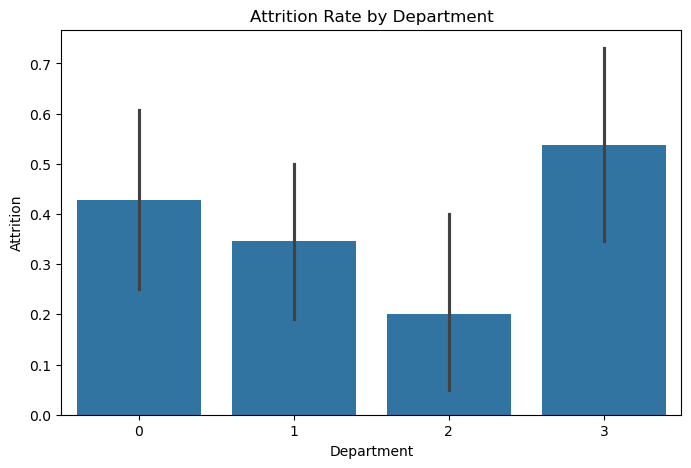

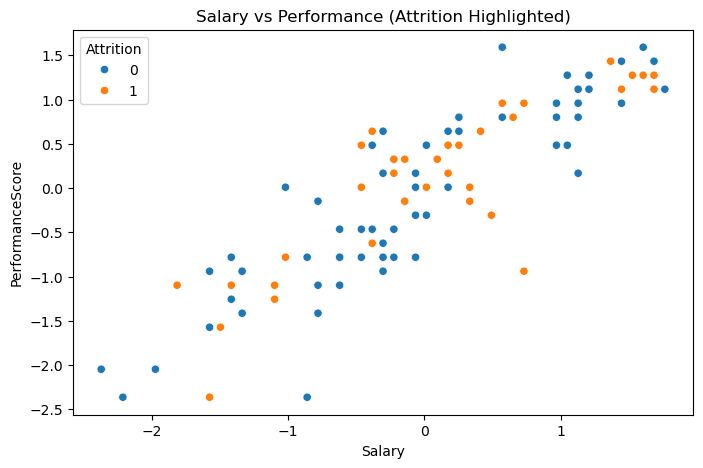

In [49]:
# Attrition by department
plt.figure(figsize=(8,5))
sns.barplot(x=employees["Department"], y=employees["Attrition"])
plt.title("Attrition Rate by Department")
plt.show()

# Salary vs Performance
plt.figure(figsize=(8,5))
sns.scatterplot(x=employees["Salary"], y=employees["PerformanceScore"], hue=employees["Attrition"])
plt.title("Salary vs Performance (Attrition Highlighted)")
plt.show()